## Assignment -2


Problem Statment

**Part 1**

Use OpenCV or any other library for Data augmentation

**Part 2**

Build a CNN network from scratch using tensorflow on transformed data, Save model with highest validation accuracy & use that saved model for inference.

**Part 3**

Modify the above architecture by using Batch normalisation, dropout,
ReduceLRonPlateau, Early stopping.

Compare the performance of the 2 models ( Part 2 and Part 3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization,Activation
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
train_images.shape


(60000, 28, 28)

In [4]:
test_labels.shape


(10000,)

In [5]:
test_images.ndim

3

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

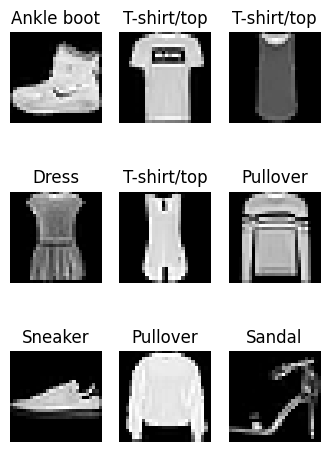

In [7]:
# visualize few sample images
plt.figure(figsize=(4,10))
for i in range(9):
  plt.subplot(5,3,i+1)
  plt.imshow(train_images[i],cmap="gray")
  plt.title(class_names[train_labels[i]])
  plt.axis('off')
plt.show()

I split train_images and train_labels into some validation data so i can check our accuracy simultaneously with validation data.

We split the data into train and validation sets.


1.   Validation size is 20%.
2.   Train size is 80%.


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_images,train_labels,test_size=0.2,random_state=42)

In [9]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)
print(test_images.shape)
print(test_labels.shape)




(48000, 28, 28)
(12000, 28, 28)
(48000,)
(12000,)
(10000, 28, 28)
(10000,)


## Normalization, Reshape and Label Encoding
### Normalization
We perform a grayscale normalization to reduce the effect of illumination's differences.
If we perform normalization, CNN works faster.
### Reshaping
Train and test images (28 x 28)
We reshape all data to 28x28x1 3D matrices.
Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.
### Label Encoding
Encode labels to one hot vectors
2 => [0,0,1,0,0,0,0,0,0,0]
4 => [0,0,0,0,1,0,0,0,0,0]

In [10]:
# Normalization
x_train = x_train / 255.0
x_val = x_val / 255.0
test_images = test_images / 255.0

In [11]:
# Reshaping
x_train = x_train.reshape(-1,28,28,1)
x_val = x_val.reshape(-1,28,28,1)
test_images = test_images.reshape((-1,28,28,1))

In [12]:
# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [13]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)
print(test_images.shape)
print(test_labels.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(48000, 10)
(12000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [15]:
x_train1 = x_train

In [16]:
print(x_train1.shape)

(48000, 28, 28, 1)


## Part 1

### Applying Data Augmentation to our training data
Augmentation Methods Used

*   Rotation range
*   Width Shift
*   Height Shift
*   Horizontal Flip








In [17]:
datagen = ImageDataGenerator(
        rotation_range=0.1,  # randomly rotate images in the range
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically, # Randomly zoom image
        horizontal_flip=True, # randomly flip images
)
datagen.fit(x_train1)

Just to demonstrate few of the augmented images i applied augmentation to first 32 images and displayed 9 images before and after augmentation

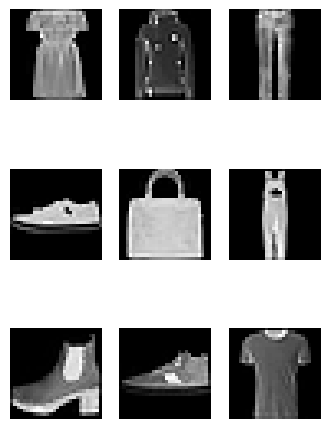

In [18]:
# visualize few sample images(Orignal)
plt.figure(figsize=(4,10))
for i in range(9):
  plt.subplot(5,3,i+1)
  plt.imshow(x_train1[i+10],cmap="gray")
  plt.axis('off')
plt.show()

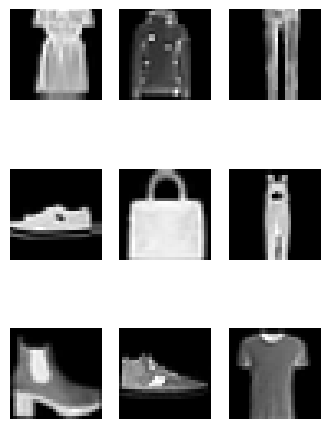

In [19]:
augmented_images = datagen.flow(x_train1, batch_size=32, shuffle=False)

# Extract a batch of augmented images
augmented_batch = next(augmented_images)

# visualize few sample images(Augmented)
plt.figure(figsize=(4, 10))
for i in range(9):
    plt.subplot(5, 3, i + 1)
    plt.imshow(augmented_batch[i+10],cmap="gray")
    plt.axis('off')

plt.show()

In [20]:
augmented_data = datagen.flow(x_train1,y_train, batch_size=64)

## Part - 2

### Build a CNN network from scratch using tensorflow

In [57]:
model1 = tf.keras.Sequential([
    layers.Conv2D(filters = 8 , kernel_size = 3,strides = (1,1),padding = 'same' , input_shape=(28, 28, 1), activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters = 16 , kernel_size = 3,strides = (1,1),padding = 'same' , activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters = 32, kernel_size = 3,strides = (1,1),padding = 'same' , activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')

])

In [58]:
model1.compile(loss ='categorical_crossentropy', optimizer='Adam',metrics =['accuracy'])

In [60]:
Final_fit = model1.fit(augmented_data, batch_size=64,epochs=20, validation_data = (x_val, y_val),
                              verbose = 1, )

Epoch 1/20
750/750 [==============================] - 48s 62ms/step - loss: 0.7815 - accuracy: 0.7088 - val_loss: 0.5371 - val_accuracy: 0.8012
Epoch 2/20
750/750 [==============================] - 40s 53ms/step - loss: 0.5641 - accuracy: 0.7895 - val_loss: 0.4719 - val_accuracy: 0.8318
Epoch 3/20
750/750 [==============================] - 42s 56ms/step - loss: 0.5044 - accuracy: 0.8128 - val_loss: 0.4633 - val_accuracy: 0.8304
Epoch 4/20
750/750 [==============================] - 47s 63ms/step - loss: 0.4673 - accuracy: 0.8261 - val_loss: 0.4457 - val_accuracy: 0.8425
Epoch 5/20
750/750 [==============================] - 43s 57ms/step - loss: 0.4377 - accuracy: 0.8374 - val_loss: 0.4142 - val_accuracy: 0.8483
Epoch 6/20
750/750 [==============================] - 39s 52ms/step - loss: 0.4236 - accuracy: 0.8428 - val_loss: 0.3865 - val_accuracy: 0.8607
Epoch 7/20
750/750 [==============================] - 41s 54ms/step - loss: 0.4048 - accuracy: 0.8506 - val_loss: 0.3750 - val_accuracy:

In [59]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 7, 7, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 32)          4640      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 3, 3, 32)         

In [61]:
loss, acc = model1.evaluate(test_images,test_labels)
print("Accuracy", acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.3273 - accuracy: 0.8762
Accuracy 0.8762000203132629


In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
# saving the model in drive so that we can use it further
path='/content/drive/My Drive/my_model/CNN_model1.keras'
model1.save(path)

Text(0.5, 1.0, 'Training and Validation Accuracy')

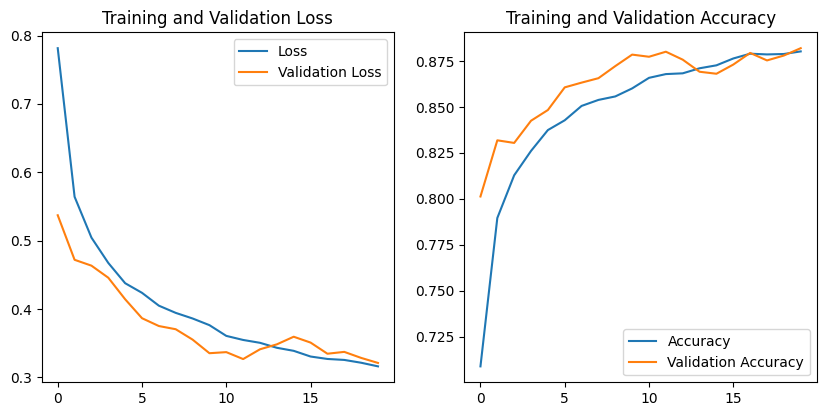

In [64]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(Final_fit.history['loss'], label='Loss')
plt.plot(Final_fit.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(2, 2, 2)
plt.plot(Final_fit.history['accuracy'], label='Accuracy')
plt.plot(Final_fit.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score

In [66]:
y_predicted_2 = model1.predict(test_images)

313/313 [==============================] - 2s 7ms/step


In [67]:
y_predicted_label_2 = [np.argmax(i) for i in y_predicted_2]

In [68]:
y_true_labels = np.argmax(test_labels, axis=1)

In [69]:
y_true_labels

array([9, 2, 1, ..., 8, 1, 5])

In [104]:
accuracy=accuracy_score(y_true_labels,y_predicted_label_2)
precision=precision_score(y_true_labels,y_predicted_label_2,average='micro')

recall=(recall_score(y_true_labels,y_predicted_label_2,average='micro'))

F1Score=f1_score(y_true_labels,y_predicted_label_2, average='micro')
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",F1Score)

Accuracy: 0.8762
Precision: 0.8762
Recall: 0.8762
F1 score: 0.8762


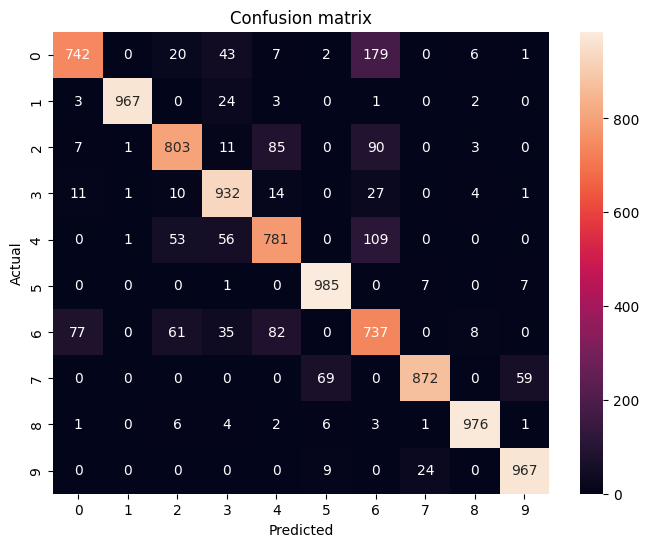

In [109]:
cm2 = confusion_matrix(y_true_labels, y_predicted_label_2)
plt.figure(figsize=(8,6))
sns.heatmap(cm2, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title("Confusion matrix")
plt.show()

## Part 3


*   Intoducing batch normalization and dropout layer in new model and then compare the result

In [86]:
# importing previous model
pretrained_model=tf.keras.models.load_model('/content/drive/My Drive/my_model/CNN_model1.keras')

In [87]:
pretrained_model.pop()
pretrained_model.pop()
pretrained_model.pop()

In [88]:
pretrained_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 7, 7, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 32)          4640      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 3, 3, 32)         

In [89]:
model2=tf.keras.Sequential()

In [90]:
for layer in pretrained_model.layers:
  model2.add(layer)

In [91]:
for layer in model2.layers:
  if isinstance(layer,layers.Conv2D):
    model2.add(layers.BatchNormalization())

In [92]:
model2.add(layers.Flatten())
model2.add(layers.Dense(64,activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(.25))
model2.add(layers.Dense(10,activation = 'softmax'))

In [93]:
model2.compile(loss ='categorical_crossentropy', optimizer='Adam',metrics =['accuracy'])

In [94]:
early_stopping_callback=EarlyStopping(patience=5,restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',
                            patience=3,
                             factor=.5,
                            Verbose=1,
                            min_lr=0.00001)

In [95]:
Final_fit2 = model2.fit(augmented_data,epochs=20, validation_data = (x_val, y_val),
                              verbose = 1,
                              callbacks=[early_stopping_callback,reduce_lr] )

Epoch 1/20
750/750 [==============================] - 45s 58ms/step - loss: 0.5814 - accuracy: 0.7958 - val_loss: 0.3830 - val_accuracy: 0.8603 - lr: 0.0010
Epoch 2/20
750/750 [==============================] - 43s 58ms/step - loss: 0.4258 - accuracy: 0.8445 - val_loss: 0.3530 - val_accuracy: 0.8698 - lr: 0.0010
Epoch 3/20
750/750 [==============================] - 42s 56ms/step - loss: 0.3931 - accuracy: 0.8554 - val_loss: 0.3405 - val_accuracy: 0.8749 - lr: 0.0010
Epoch 4/20
750/750 [==============================] - 40s 53ms/step - loss: 0.3774 - accuracy: 0.8605 - val_loss: 0.4066 - val_accuracy: 0.8460 - lr: 0.0010
Epoch 5/20
750/750 [==============================] - 40s 53ms/step - loss: 0.3637 - accuracy: 0.8661 - val_loss: 0.3207 - val_accuracy: 0.8793 - lr: 0.0010
Epoch 6/20
750/750 [==============================] - 42s 56ms/step - loss: 0.3578 - accuracy: 0.8672 - val_loss: 0.3347 - val_accuracy: 0.8738 - lr: 0.0010
Epoch 7/20
750/750 [==============================] - 42s 

Text(0.5, 1.0, 'Training and Validation Accuracy')

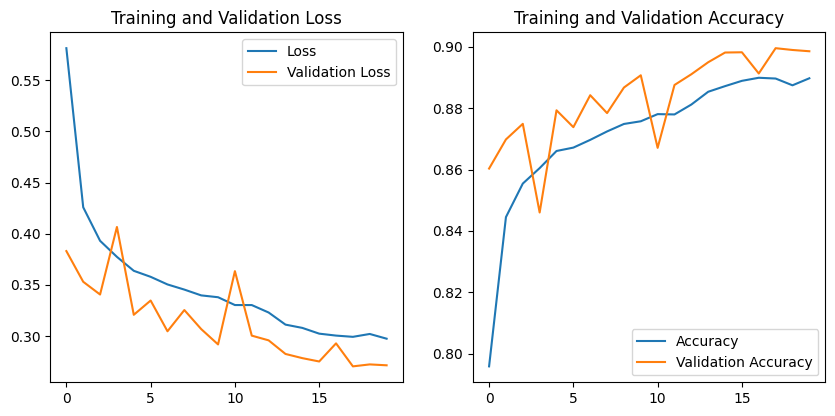

In [96]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(Final_fit2.history['loss'], label='Loss')
plt.plot(Final_fit2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(2, 2, 2)
plt.plot(Final_fit2.history['accuracy'], label='Accuracy')
plt.plot(Final_fit2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

In [111]:
path='/content/drive/My Drive/my_model/CNN_model2_batch_normalization_dropout.keras'
model2.save(path)
# saving model2 in google drive

In [97]:
loss, acc = model2.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.2816 - accuracy: 0.8944


In [100]:
y_predicted_3 = model2.predict(test_images)

313/313 [==============================] - 2s 7ms/step


In [101]:
y_predicted_label_3 = [np.argmax(i) for i in y_predicted_3]

In [103]:
accuracy=accuracy_score(y_true_labels,y_predicted_label_3)
precision=precision_score(y_true_labels,y_predicted_label_3,average='micro')

recall=(recall_score(y_true_labels,y_predicted_label_3,average='micro'))

F1Score=f1_score(y_true_labels,y_predicted_label_3, average='micro')
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",F1Score)

Accuracy: 0.8944
Precision: 0.8944
Recall: 0.8944
F1 score: 0.8944


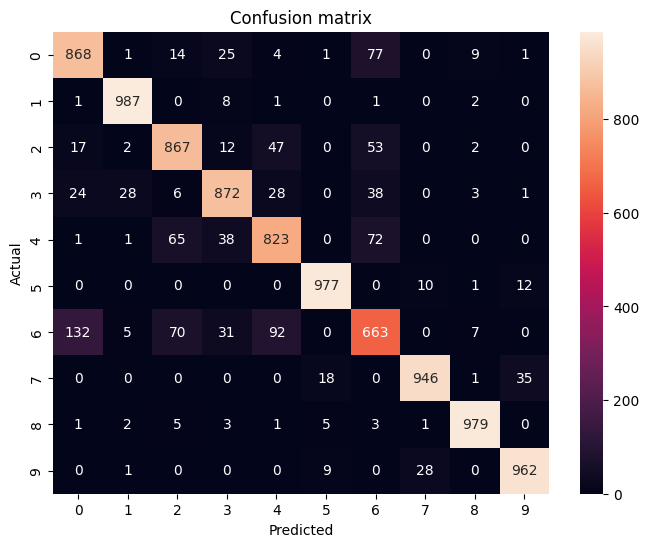

In [110]:

cm3 = confusion_matrix(y_true_labels, y_predicted_label_3)
plt.figure(figsize=(8,6))
sns.heatmap(cm3, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title("Confusion matrix")
plt.show()



---



---




Model 1 - Model with normal architecture

Model 2 - Model with modifyed arcitecture containing Batch normalisation, dropout,
 ReduceLRonPlateau, Early stopping.
# Result
1.   Model 2 performed better than Model 1 as the accuracy for test data from model 2 was 89.44 % and from model 1 was 87.62%
2.   We got Loss in Model 2 28.16 % and in model 1 32.73 on the test dataset therefore, model 2 perfomrmed better

Other evaluation matrices -

Model 1 ---
*  Precision: 0.8762
*  Recall: 0.8762
*  F1 score: 0.8762

Model 2 ---
*  Precision:  0.8944
*  Recall: 0.8944
*  F1 score: 0.8944

From all of the above evalutation we can see that model  2 performed better than model 1




